<a href="https://colab.research.google.com/github/krishna-bbsm/Deep-Learning-Based-Attendance-Tracking-System/blob/main/DAAS_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Setting up the working directory
%cd /content/drive/My Drive/Projects/Automated Attendance System
! ls

/content/drive/My Drive/Projects/Automated Attendance System
AAS_v1.ipynb	haarcascade_frontalface_default.xml  README.md
group_of_faces	haarcascade_profileface.xml	     Students


In [3]:
#importing necessary libraries
import cv2
import os
import numpy as np
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image

In [4]:
# Defining imshow function
def imshow(title = "Image", image = None, size = 8):
      w, h = image.shape[0], image.shape[1]
      aspect_ratio = w/h
      plt.figure(figsize=(size * aspect_ratio,size))
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.title(title)
      plt.show()

In [5]:
# Function to setup the directories where the images get stored
def makedir(directory):
      if not os.path.exists(directory):
            os.makedirs(directory)
            return None
      else:
            pass

# Directory of image of persons we'll be extracting faces from
makedir("./Students")
mypath = "./Students/"

In [6]:
# Load the Haar Cascade classifier for face detection
face_detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
profile_face_detector = cv2.CascadeClassifier('haarcascade_profileface.xml')

In [7]:
# Collect image file names from the specified directory
image_file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print("Collected " + str(len(image_file_names)) + " images")
makedir("./group_of_faces/")

Collected 3 images


In [8]:
# Face extraction from the collected images and saving process
for image_name in image_file_names:
      person_image = cv2.imread(mypath + image_name)
      face_info = face_detector.detectMultiScale(person_image, 1.3, 5)

      for (x, y, w, h) in face_info: # Process each detected face
            face = person_image[y:y + h, x:x + w]
            roi = cv2.resize(face, (128, 128), interpolation=cv2.INTER_CUBIC)

      # Save the extracted face
      path = "./group_of_faces/" + "face_" + image_name
      cv2.imwrite(path, roi)

In [9]:
!pip install keras_vggface
!pip install kaggle

In [10]:
# Set Kaggle credentials as environment variables
os.environ['KAGGLE_USERNAME'] = 'krishnabbsm'
os.environ['KAGGLE_KEY'] = '2c22bfa70eba88e4737fb2633af8bc5d'
# Download the specified dataset from Kaggle
!kaggle datasets download -d acharyarupak391/vggfaceweights

 97% 505M/521M [00:12<00:00, 49.8MB/s]
100% 521M/521M [00:12<00:00, 44.3MB/s]


In [11]:
import zipfile
# Extract the downloaded zip file in the working directory
with zipfile.ZipFile('vggfaceweights.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [25]:
def preprocess_image(image_path):
    #Loads image from path and resizes it
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

#Model Configuration
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

# Load pre-trained weights into the model (Transfer Learning)
model.load_weights("vgg_face_weights.h5")

In [26]:
# Create VGGFace descriptor model (output without the final classification layer)
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)
# Use the VGGFace descriptor model for face representation computation
model = vgg_face_descriptor

# Directory path to the extracted faces
people_pictures = "./group_of_faces/"
all_people_faces = dict()

# Compute face representations for each extracted face
for file in listdir(people_pictures):
    person_face, extension = os.path.splitext(file)
    try:
        all_people_faces[person_face] = model.predict(preprocess_image('./group_of_faces/%s.jpg' % (person_face)))[0,:]
    except:
        pass

print("Face representations retrieved successfully")

1/1 [==============================] - 1s 580ms/step
Face representations retrieved successfully


In [29]:
from IPython.display import display, Javascript
import ipywidgets as widgets
from PIL import Image
import io
import os

# Create a button widget
button = widgets.Button(description="Capture")

# Function to capture and save the iamge
def capture_image(_):
    # Capture the image using Colab's image capture feature
    from google.colab import files
    uploaded_image = files.upload()

    # Save the captured image
    for img_name, img_data in uploaded_image.items():
        img = Image.open(io.BytesIO(img_data))
        img.save("input_frame.jpg")
        break  # Only consider the first uploaded image

    # Delete the uploaded file
    for img_name in uploaded_image.keys():
        os.remove(img_name)

    # Print success message
    print("Input_frame saved successfully")

# Register the button click event
button.on_click(capture_image)

# Display the button widget
display(button)

# Hide additional upload outputs visually
display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 50})'))


Button(description='Capture', style=ButtonStyle())

<IPython.core.display.Javascript object>

Saving frame_1.jpg to frame_1.jpg
Input_frame saved successfully


1/1 [==============================] - 1s 540ms/step


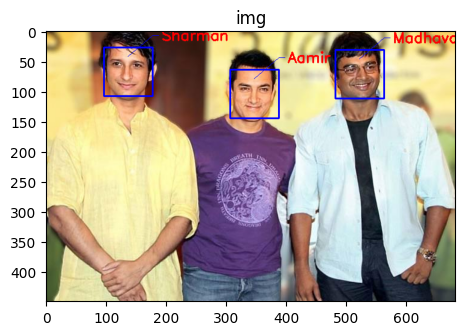

Attendance Marked Successfully


In [33]:
import cv2
import numpy as np
import openpyxl
from openpyxl.utils import get_column_letter
from openpyxl import Workbook
from datetime import datetime

# Function to find cosine similarity between two representations
def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

# Load the image
img = cv2.imread('input_frame.jpg')

# Detect frontal faces
frontal_faces = face_detector.detectMultiScale(img, 1.5, 5)

profile_face_detector = cv2.CascadeClassifier('haarcascade_profileface.xml')

# Detect profile faces
profile_faces = profile_face_detector.detectMultiScale(img, 1.5, 5)
profile_faces = np.reshape(profile_faces, (-1, 4))  # Reshape to have 2 dimensions

def is_overlap(box1, box2):
    # Get the coordinates of the centers of the boxes
    box1_center = [box1[0] + box1[2] / 2, box1[1] + box1[3] / 2]
    box2_center = [box2[0] + box2[2] / 2, box2[1] + box2[3] / 2]

    # Check if the center of box1 is within box2
    if (box2[0] <= box1_center[0] <= box2[0] + box2[2]) and (box2[1] <= box1_center[1] <= box2[1] + box2[3]):
        return True

    # Check if the center of box2 is within box1
    if (box1[0] <= box2_center[0] <= box1[0] + box1[2]) and (box1[1] <= box2_center[1] <= box1[1] + box1[3]):
        return True

    return False

# Combine the detected faces
all_faces = np.concatenate((frontal_faces, profile_faces))

# Create a new list to store the non-overlapping faces
non_overlapping_faces = []

for face in all_faces:
    overlap = False
    for non_overlap_face in non_overlapping_faces:
        if is_overlap(face, non_overlap_face):
            overlap = True
            break
    if not overlap:
        non_overlapping_faces.append(face)

# Use non_overlapping_faces instead of all_faces for the rest of your code


# Load the existing workbook or create a new one
try:
    workbook = openpyxl.load_workbook('data.xlsx')
    sheet = workbook.active
    # Check if the sheet is empty (i.e., it has only one row)
        # Add column headings
    sheet['A1'] = 'Name'
    sheet['B1'] = 'Date'
    sheet['C1'] = 'Time of Entry'
except FileNotFoundError:
    workbook = Workbook()
    sheet = workbook.active
    # Add column headings
    sheet['A1'] = 'Name'
    sheet['B1'] = 'Date'
    sheet['C1'] = 'Time of Entry'

for (x, y, w, h) in non_overlapping_faces:
    x, y, w, h = int(x), int(y), int(w), int(h)  # Convert coordinates to integers
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)  # Draw rectangle on the main image
    detected_face = img[y:y+h, x:x+w]  # Crop the detected face
    detected_face = cv2.resize(detected_face, (224, 224))  # Resize to 224x224

    img_pixels = cv2.cvtColor(detected_face, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img_pixels = img_pixels.astype('float32')  # Convert data type to float32
    img_pixels /= 255  # Normalize pixel values

    captured_representation = model.predict(np.expand_dims(img_pixels, axis=0))[0, :]

    found = 0
    font_scale = 0.8
    for i in all_people_faces:
        person_name = i
        representation = all_people_faces[i]

        similarity = findCosineSimilarity(representation, captured_representation)
        if similarity < 0.35:
            cv2.putText(img, person_name[5:], (x+w+15, y-12), cv2.FONT_HERSHEY_SIMPLEX,font_scale,(0, 0, 255), 2)
            found = 1

            # Get the current date and time
            date = datetime.now().strftime("%Y-%m-%d")
            time = datetime.now().strftime("%H:%M:%S")

            # Get the next available row in the sheet
            next_row = sheet.max_row + 1

            # Write the detected person's name, date, and time to the sheet
            sheet.cell(row=next_row, column=1, value=person_name[5:])
            sheet.cell(row=next_row, column=2, value=date)
            sheet.cell(row=next_row, column=3, value=time)

            break

    # Connect face and text
    cv2.line(img, ((x+x+w)//2, y+15), (x+w, y-20), (255, 0, 0), 1)
    cv2.line(img, (x+w, y-20), (x+w+10, y-20), (255, 0, 0), 1)

    if found == 0:  # If found image is not in our people database
        cv2.putText(img, 'unknown', (x+w+15, y-12), cv2.FONT_HERSHEY_SIMPLEX,font_scale, (255, 0, 0), 4)

# Save the workbook
workbook.save('data.xlsx')
imshow('img', img)
print("Attendance Marked Successfully")

In [32]:
cv2.imwrite('output_image.jpg',img)

True